In [ ]:

#%pip install mtcnn opencv-python-headless matplotlib numpy

  Using cached mtcnn-1.0.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached opencv_python_headless-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached mtcnn-1.0.0-py3-none-any.whl (1.9 MB)
Using cached opencv_python_headless-4.12.0.88-cp37-abi3-win_amd64.whl (38.9 MB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 8.1/8.1 MB 62.8 MB/s  0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 85.6 MB/s  0:00:00
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)

   ----------------------------------------  0/10 [pyparsing]
   ---- --------

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN # detector de rostros basado en redes neuronales convolucionales.
from time import time

img = cv2.imread('grupo.jpg')  # reemplaza por tu archivo

# Check if the image was loaded successfully
if img is None:
    print("Error: Could not load image 'rostro.jpg'. Please make sure the file exists and is accessible.")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    detector = MTCNN()   # puedes ajustar min_face_size
    t0 = time()
    res = detector.detect_faces(img_rgb) # Devuelve una lista de diccionarios con el rostro detectado
    t1 = time()

    print(f"Detected: {len(res)} rostro(s) • tiempo: {(t1 - t0)*1000:.1f} ms")
    for r in res:
        print(r['confidence'], r['box'], r['keypoints'].keys())
     

Detected: 22 rostro(s) • tiempo: 1094.1 ms
0.9999978542327881 [1579, 687, 42, 52] dict_keys(['nose', 'mouth_right', 'right_eye', 'left_eye', 'mouth_left'])
0.9999946355819702 [1026, 688, 40, 55] dict_keys(['nose', 'mouth_right', 'right_eye', 'left_eye', 'mouth_left'])
0.9999876022338867 [989, 438, 39, 52] dict_keys(['nose', 'mouth_right', 'right_eye', 'left_eye', 'mouth_left'])
0.9999830722808838 [883, 698, 40, 46] dict_keys(['nose', 'mouth_right', 'right_eye', 'left_eye', 'mouth_left'])
0.9999827146530151 [687, 405, 40, 50] dict_keys(['nose', 'mouth_right', 'right_eye', 'left_eye', 'mouth_left'])
0.9997813105583191 [1737, 683, 41, 49] dict_keys(['nose', 'mouth_right', 'right_eye', 'left_eye', 'mouth_left'])
0.999667763710022 [306, 693, 41, 51] dict_keys(['nose', 'mouth_right', 'right_eye', 'left_eye', 'mouth_left'])
0.9996241331100464 [521, 423, 37, 45] dict_keys(['nose', 'mouth_right', 'right_eye', 'left_eye', 'mouth_left'])
0.9996139407157898 [164, 690, 42, 52] dict_keys(['nose', 'm

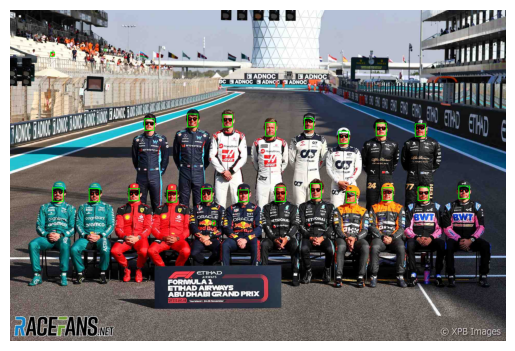

In [21]:
vis = img_rgb.copy()
for r in res:
    x, y, w, h = r['box']
    cv2.rectangle(vis, (x,y), (x+w, y+h), (0,255,0), 2)
    for name, (px,py) in r['keypoints'].items():
        cv2.circle(vis, (px,py), 2, (255,0,0), -1)

plt.imshow(vis)
plt.axis('off')
plt.show()

In [22]:
detector = MTCNN()  # su NMS interno filtra solapes
# Prueba filtrado por confianza mínima
thr = 0.95
filtrados = [r for r in res if r['confidence'] >= thr]
print(f"Con thr={thr} quedan {len(filtrados)} rostros")

Con thr=0.95 quedan 20 rostros


In [23]:
tiempos = []
for i in range(5):
  t0 = time()
  res = detector.detect_faces(img_rgb)
  t1 = time()
  tiempos.append((t1-t0) * 1000) # ms
print(f"Promedio de inferencia (5 corridas): {np.mean(tiempos):.1f} ms")

Promedio de inferencia (5 corridas): 1050.0 ms


In [24]:
def iou(a, b):
    # a,b en formato [x,y,w,h]
    ax1, ay1, aw, ah = a; ax2, ay2 = ax1+aw, ay1+ah
    bx1, by1, bw, bh = b; bx2, by2 = bx1+bw, by1+bh
    ix1, iy1 = max(ax1,bx1), max(ay1,by1)
    ix2, iy2 = min(ax2,bx2), min(ay2,by2)
    inter = max(0, ix2-ix1)*max(0, iy2-iy1)
    union = aw*ah + bw*bh - inter
    return inter/union if union>0 else 0.0